In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
import pickle

In [42]:
x=pd.read_csv('Police_Rank.csv')
x.head()

,Crime_Type,Money_looted(Rs),Officer_Rank
0,rape,100,ASP
1,murder,2000,DSP
2,burglary,500000,Inspector
3,fraud,10000,Inspector
4,rape,1000,ASP


In [43]:
x.shape

(40, 3)

In [44]:
x.describe()

,Money_looted(Rs)
count,4.000000e+01
mean,4.880700e+05
std,1.193769e+06
min,0.000000e+00
25%,3.800000e+03
50%,4.000000e+04
75%,3.000000e+05
max,6.000000e+06


In [45]:
x.count()

Crime_Type          40
Money_looted(Rs)    40
Officer_Rank        40
dtype: int64

In [46]:
# Unique Value Count
print(x.value_counts())
print('---------------')
print('---------------')
print('---------------')
print(x.nunique)
print('---------------')
print('---------------')
print('---------------')
print(x['Crime_Type'].unique())
print('---------------')
print('---------------')
print('---------------')
print(x['Officer_Rank'].unique())


Crime_Type  Money_looted(Rs)  Officer_Rank
fraud       30000             Inspector       2
rape        100               ASP             2
fraud       10000             Inspector       2
burglary    10000             Inspector       1
murder      800000            ASP             1
            50000             DSP             1
            90000             DSP             1
            150000            ASP             1
            300000            ASP             1
            500000            ASP             1
rape        0                 ASP             1
murder      10000             DSP             1
rape        200               ASP             1
            500               ASP             1
            700               ASP             1
            1000              ASP             1
            3200              ASP             1
            4000              ASP             1
murder      20000             DSP             1
            2000              DSP            

## Data Cleaning

In [47]:
x.isnull().sum()

Crime_Type          0
Money_looted(Rs)    0
Officer_Rank        0
dtype: int64

In [48]:
print("Percentage of null value")
(x.isnull().sum()/x.shape[0])*100

Percentage of null value


Crime_Type          0.0
Money_looted(Rs)    0.0
Officer_Rank        0.0
dtype: float64

<AxesSubplot: ylabel='Money_looted(Rs)'>

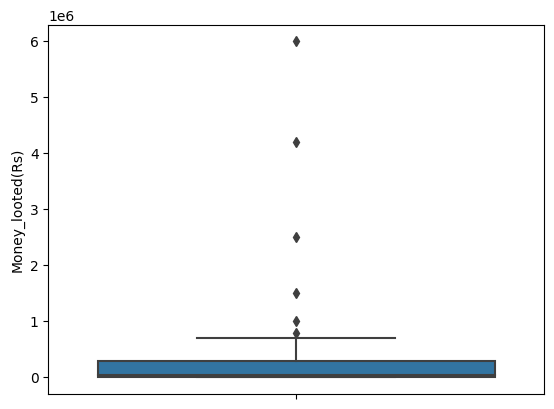

In [49]:
sns.boxplot(y=x['Money_looted(Rs)'])

## Data Preprocessing

In [50]:
le=LabelEncoder()
x['Crime_Type']=le.fit_transform(x['Crime_Type'])
x
# 3:-rape  2:-murder   0:-burglary  1:-fraud

,Crime_Type,Money_looted(Rs),Officer_Rank
0,3,100,ASP
1,2,2000,DSP
2,0,500000,Inspector
3,1,10000,Inspector
4,3,1000,ASP
5,2,5000,DSP
6,0,200000,Inspector
7,1,30000,Inspector
8,3,500,ASP
9,2,10000,DSP


In [51]:
x['Officer_Rank']=le.fit_transform(x['Officer_Rank'])
x.head(5)
# 0:-ASP 1:-DSP 2:-Inspector

,Crime_Type,Money_looted(Rs),Officer_Rank
0,3,100,0
1,2,2000,1
2,0,500000,2
3,1,10000,2
4,3,1000,0


## Ml Training

In [52]:
xtrain=x[['Crime_Type','Money_looted(Rs)']]
ytrain=x['Officer_Rank']

In [53]:
x_train=xtrain.iloc[:, ]
y_train=ytrain.iloc[:,]

In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.20,random_state=20)

In [55]:
model=DecisionTreeClassifier(criterion='gini',splitter='best')
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [56]:
print('Testing Accuracy:',model.score(xtest,ytest))

Testing Accuracy: 0.75


In [57]:
predictions=model.predict(xtest)

In [60]:
matrix=confusion_matrix(ytest,predictions)
matrix

array([[2, 1, 0],
       [0, 2, 1],
       [0, 0, 2]], dtype=int64)

In [62]:
model_tree=DecisionTreeClassifier(max_depth=8,criterion='gini',splitter='best')
model_tree.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=8)

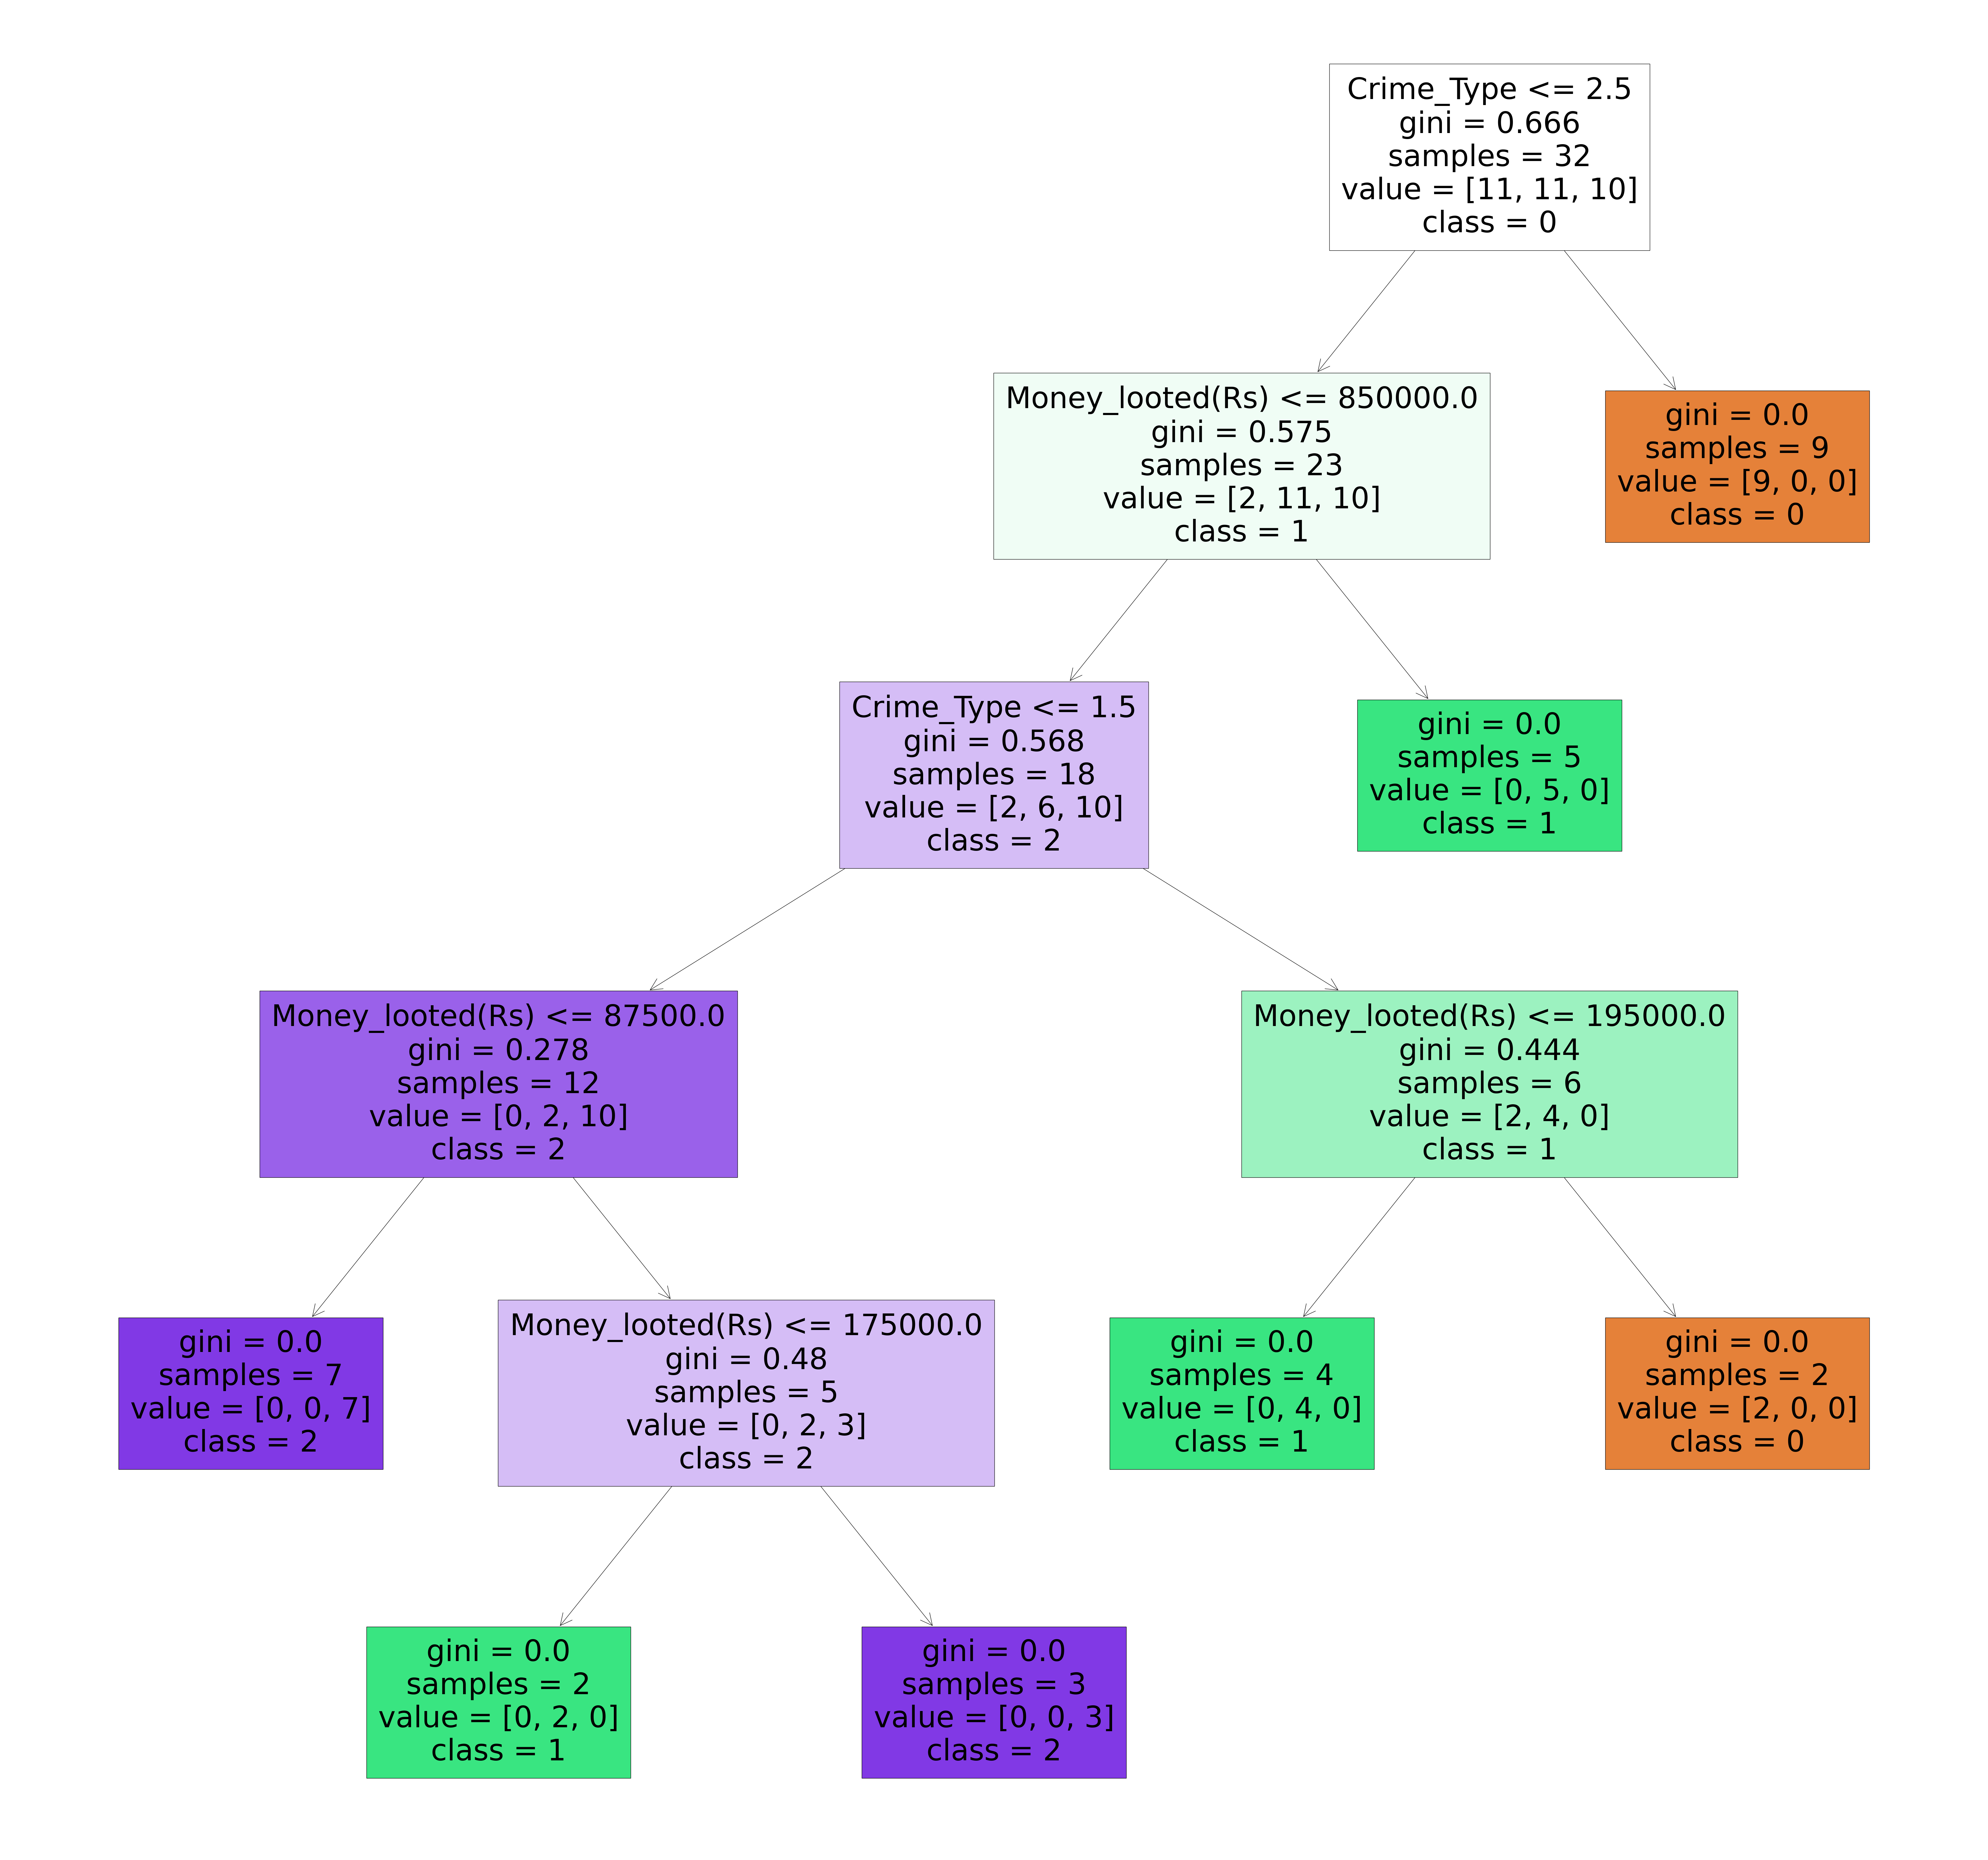

In [65]:
# Visualizing tree
from sklearn import tree

fig=plt.figure(figsize=(85,80))
_=tree.plot_tree(model,max_depth=5,feature_names=x_train.columns,class_names=['0','1','2','3'],filled=True)

In [75]:
model.predict([[2,10]]).reshape(-1,1).astype(int)

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1]])

In [66]:
x

,Crime_Type,Money_looted(Rs),Officer_Rank
0,3,100,0
1,2,2000,1
2,0,500000,2
3,1,10000,2
4,3,1000,0
5,2,5000,1
6,0,200000,2
7,1,30000,2
8,3,500,0
9,2,10000,1


In [76]:
pickle.dump(model,open('model1.pkl','wb'))